## Hebb's learning rule

> **Postulate:**
>   When an axon of cell A is near enough to excite a cell B adn reapeatedly or persistently takes part in firing it, some growth [...] takes place in one or both cells such that A's efficiency, as one of the cells firing B, is increased.

**Linear associator network:** 

$a = Wp \rightarrow a_i = \Sigma_{j=1}^R w_{ij}p_j$

**Unsupervised rule:** 

$w_{i,j}^{new} = w_{i,j}^{old} + \alpha  f(a_{iq}) g(p_{jq})$

**Supervised rule:** 

$w_{i,j}^{new} = w_{i,j}^{old} +  t_{iq} p_{jq}$ 

$ W^{new} = W^{old} + t_q p_q^t$

**Matrix of weights starting from $O$:** 

$W = TP^t$

**Minimized error matrix of weights:**

$W=TP^{+}$

$P^{+} = (P^tP)^{-1}P^t$, (pseudo inverse)

In [34]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from components.layer import Layer
from components.activations import hardlims

## Dataset 
Simple binary images 6x5 of the numbers 0, 1 and 2.

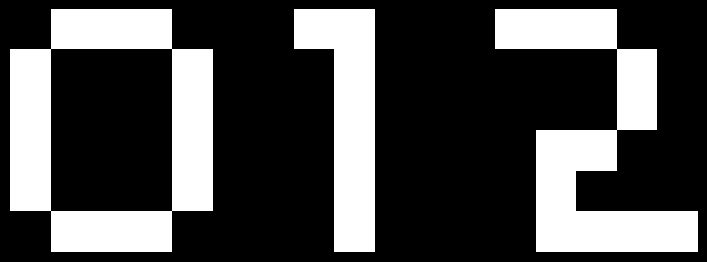

In [35]:
digits = [
    np.array([
        [-1, 1, 1, 1, -1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [1, -1, -1, -1, 1],
        [-1, 1, 1, 1, -1],
    ], dtype=np.int8),

    np.array([
        [-1, 1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
        [-1, -1, 1, -1, -1],
    ], dtype=np.int8),

    np.array([
        [1, 1, 1, -1, -1],
        [-1, -1, -1, 1, -1],
        [-1, -1, -1, 1, -1],
        [-1, 1, 1, -1, -1],
        [-1, 1, -1, -1, -1],
        [-1, 1, 1, 1, 1],
    ], dtype=np.int8),
]

fig = plt.figure(figsize=(12, 18))
fig.patch.set_facecolor([0,0,0])

plotIdx = 1
for img in digits:
    ax = plt.subplot(1, 4, plotIdx)
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)
    plotIdx += 1
plt.show()

### Network

$a = hardlims(Wp)$

In [36]:
net = Layer([])
net.set_activations([hardlims for i in range(0,30)])
net.set_biases([0 for i in range(0,30)])

### Training

In [37]:
# p = t, the training inputs are the desired outputs prototypes

p1, p2, p3 = [arr.flatten() for arr in digits]
P = np.array([p1, p2, p3])
T = np.array([p1, p2, p3])


W = np.matmul(P.T, T)
net.set_weights(W.tolist())

### Recovering 1/2

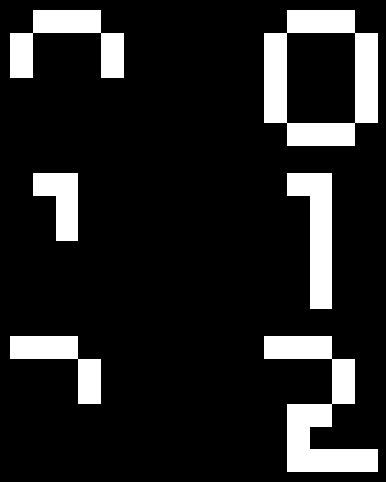

In [39]:
def plotImg(idx, img):
    plt.subplot(3, 2, idx)
    plt.axis('off')
    plt.imshow(img, cmap='gray', vmin=0, vmax=1)

def test():
    half_digits = [
        np.array([
            [-1, 1, 1, 1, -1],
            [1, -1, -1, -1, 1],
            [1, -1, -1, -1, 1],
            [-1, -1, -1, -1, -1],
            [-1, -1, -1, -1, -1],
            [-1, -1, -1, -1, -1],
        ], dtype=np.int8),

        np.array([
            [-1, 1, 1, -1, -1],
            [-1, -1, 1, -1, -1],
            [-1, -1, 1, -1, -1],
            [-1, -1, -1, -1, -1],
            [-1, -1, -1, -1, -1],
            [-1, -1, -1, -1, -1],
        ], dtype=np.int8),

        np.array([
            [1, 1, 1, -1, -1],
            [-1, -1, -1, 1, -1],
            [-1, -1, -1, 1, -1],
            [-1, -1, -1, -1, -1],
            [-1, -1, -1, -1, -1],
            [-1, -1, -1, -1, -1],
        ], dtype=np.int8),
    ]


    fig = plt.figure(figsize=(6, 6))
    fig.patch.set_facecolor([0,0,0])

    plotIdx = 1
    for digit in half_digits:
        plotImg(plotIdx, digit)
        plotIdx += 1

        flatten = digit.flatten().tolist()
        result = net.activate(flatten)

        result = np.array(result).reshape((6,5))
        plotImg(plotIdx, result)
        plotIdx += 1

test()